In [1]:
%matplotlib inline
from cox import readers
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

In [2]:
def filter_df(df, **kwargs):
    for k, v in kwargs.items():
        df = df[df[k] == v]
    return df

In [4]:
r = readers.CollectionReader('../src/no_norm_adv/agents/')

100%|██████████| 196/196 [00:20<00:00,  9.59it/s]


In [8]:
r2 = readers.CollectionReader('../src/reward_const_scale/agents')

100%|██████████| 240/240 [00:11<00:00, 20.04it/s]


In [5]:
games = ["Walker2d-v2", "Humanoid-v2", "Swimmer-v2", "Hopper-v2",
         "HalfCheetah-v2", "InvertedPendulum-v2", "Reacher-v2",
         "InvertedDoublePendulum-v2"]
code_level_opts = {
      'clip_eps': [0.2, 1e8],
      'kl_penalty_coeff': [0.0, 0.1, 1.0, 3.0],
      'norm_advantages': [True, False],
      'norm_rewards': ['none', 'returns', 'constant'],
    
}

In [24]:
metadata = pd.concat([r.df('metadata'), r2.df('metadata')], axis=0)
opt = pd.concat([r.df('optimization'), r2.df('optimization')], axis=0)
opt['opt_step'] = opt.index
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
opt = opt.merge(key_metadata, on='exp_id')
adv_stats = r.df('advantage_stats')
adv_stats['opt_step'] = (adv_stats.index % 50) * 10
constraints = r.df('paper_constraints_train')
constraints_heldout = r.df('paper_constraints_heldout')
constraints = constraints.merge(key_metadata, on='exp_id')
constraints_heldout = constraints_heldout.merge(key_metadata, on='exp_id')
adv_stats = adv_stats.merge(key_metadata, on='exp_id')

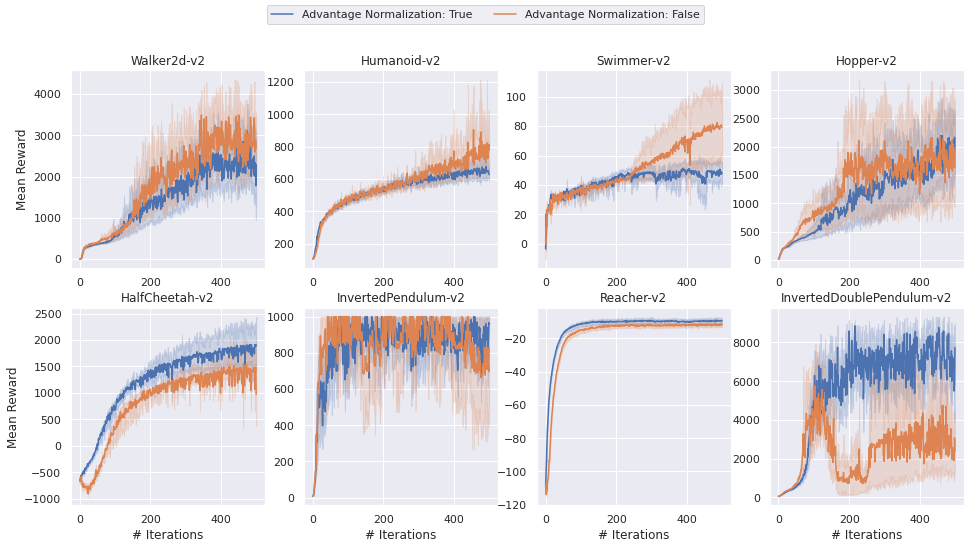

In [18]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for b in [True, False]:
        filt = filter_df(opt, game=g, clip_eps=0.2, kl_penalty_coeff=0.0, norm_rewards='returns',
                         norm_advantages=b)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"Advantage Normalization: {b}", legend=False)
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Reward')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)
    
plt.show()

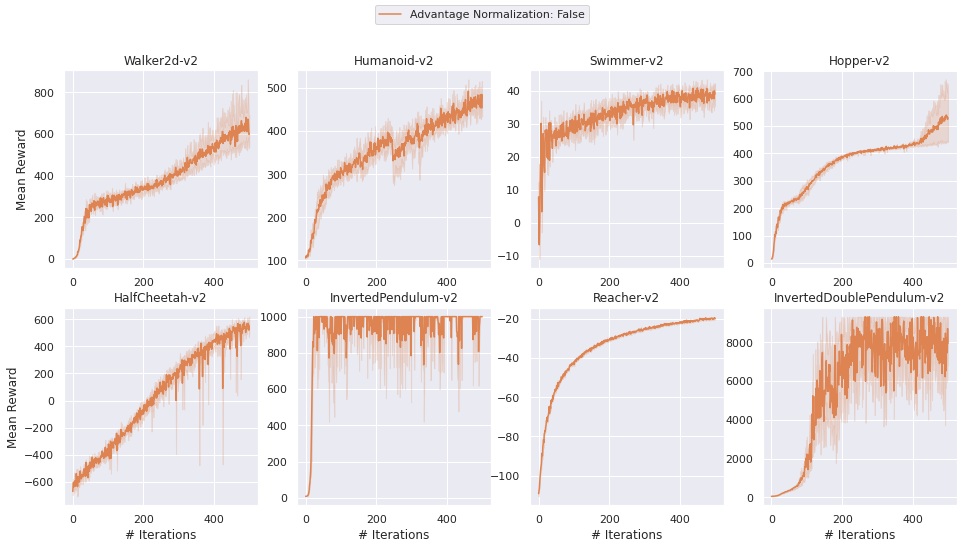

In [27]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for b in [True, False]:
        filt = filter_df(opt, game=g, kl_penalty_coeff=3.0, norm_rewards='returns',
                         norm_advantages=b)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"Advantage Normalization: {b}", legend=False)
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Reward')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)
    
plt.show()

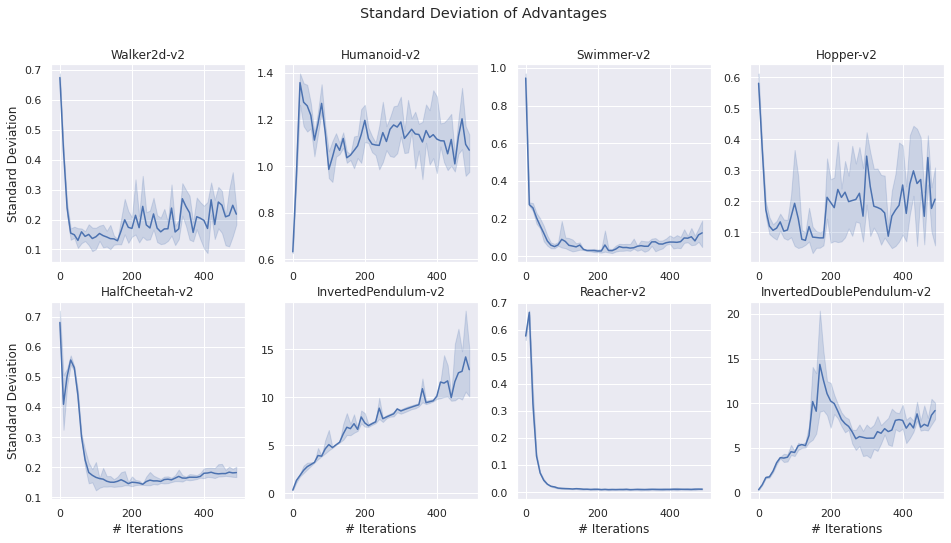

In [25]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    filt = filter_df(adv_stats, game=g, clip_eps=0.2, kl_penalty_coeff=0.0, norm_rewards='returns',
                     norm_advantages=False)
    sns.lineplot(filt.opt_step, filt.std_pre_norm, n_boot=10,
                 ax=ax.flatten()[j])
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Standard Deviation')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
fig.suptitle('Standard Deviation of Advantages')
    
plt.show()

## Plots on only no_norm_adv data

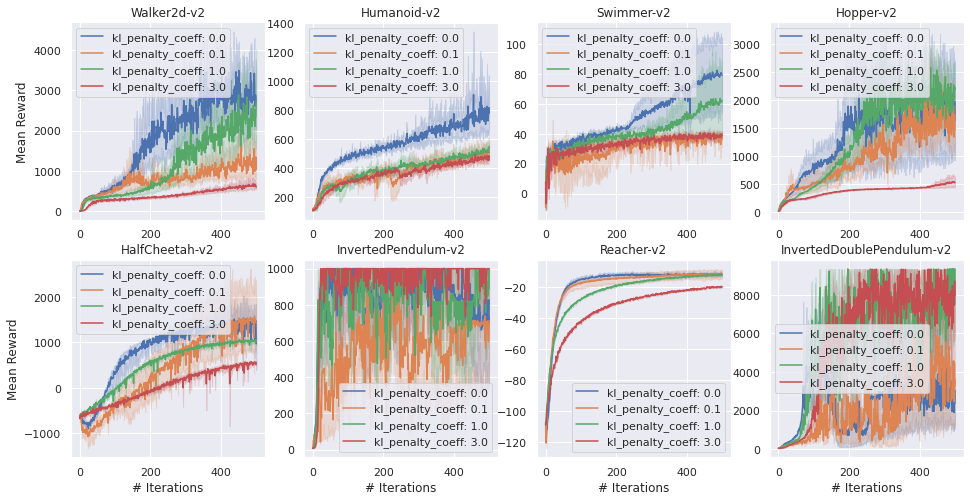

In [10]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt = 'kl_penalty_coeff'
    for b in code_level_opts[cl_opt]:
        filt = opt[(opt[cl_opt] == b) & (opt.game == g)]
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"{cl_opt}: {b}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Reward')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
plt.show()

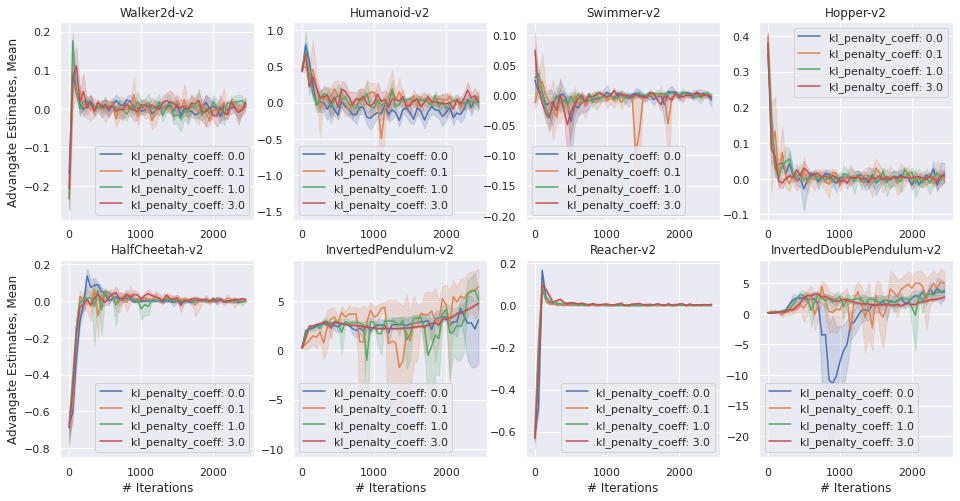

In [19]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt = 'kl_penalty_coeff'
    for b in code_level_opts[cl_opt]:
        filt = filter_df(adv_stats, kl_penalty_coeff=b, game=g)
        sns.lineplot(filt.opt_step, filt.mean_pre_norm, n_boot=100,
                     ax=ax.flatten()[j], label=f"{cl_opt}: {b}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Advangate Estimates, Mean')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
plt.show()

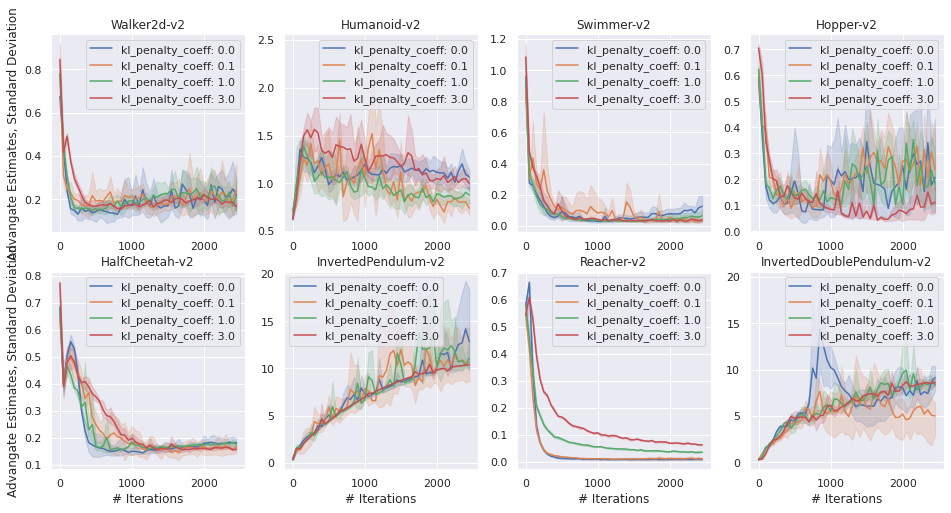

In [20]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt = 'kl_penalty_coeff'
    for b in code_level_opts[cl_opt]:
        filt = filter_df(adv_stats, kl_penalty_coeff=b, game=g)
        sns.lineplot(filt.opt_step, filt.std_pre_norm, n_boot=100,
                     ax=ax.flatten()[j], label=f"{cl_opt}: {b}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Advangate Estimates, Standard Deviation')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
plt.show()

In [16]:
adv_stats.head()

,mean_pre_norm,std_pre_norm,opt_step,skewness,kurtosis,max,min,exp_id,game,clip_eps,kl_penalty_coeff,norm_advantages
0,-0.191040,0.704503,0,-0.433399,7.541331,6.989936,-4.972630,05482319-c319-4c32-aa17-6bf003eae380,Walker2d-v2,0.2,0.0,False
1,0.110857,0.428631,50,-0.236458,3.420449,3.490767,-3.580842,05482319-c319-4c32-aa17-6bf003eae380,Walker2d-v2,0.2,0.0,False
2,0.059390,0.265362,100,-0.616742,4.921439,4.849123,-4.714849,05482319-c319-4c32-aa17-6bf003eae380,Walker2d-v2,0.2,0.0,False
3,-0.011310,0.194504,150,-0.196804,5.404495,5.724912,-3.781965,05482319-c319-4c32-aa17-6bf003eae380,Walker2d-v2,0.2,0.0,False
4,0.015796,0.166295,200,-1.066721,7.740966,4.738175,-5.589657,05482319-c319-4c32-aa17-6bf003eae380,Walker2d-v2,0.2,0.0,False


## Older Plots

In [2]:
r = readers.CollectionReader('../src/no_adv_norm/agents/')

100%|██████████| 4/4 [00:00<00:00,  4.00it/s]


In [3]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index
#nadv = r.df('normalized_advantage')
#nadv['opt_step'] = (nadv.index % 50) * 10
constraints = r.df('paper_constraints_train')
constraints_heldout = r.df('paper_constraints_heldout')

In [4]:
games = ["HalfCheetah-v2", "Walker2d-v2", "Humanoid-v2", "Hopper-v2"]
code_level_opts = {
      'kl_npg_form': [True],
      'kl_penalty_direction': ['new_to_old']
}

NUM_BINS = 20

In [5]:
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
constraints = constraints.merge(key_metadata, on='exp_id')
constraints_heldout = constraints_heldout.merge(key_metadata, on='exp_id')
#nadv = nadv.merge(key_metadata, on='exp_id')
opt = opt.merge(key_metadata, on='exp_id')

# Plot mean rewards

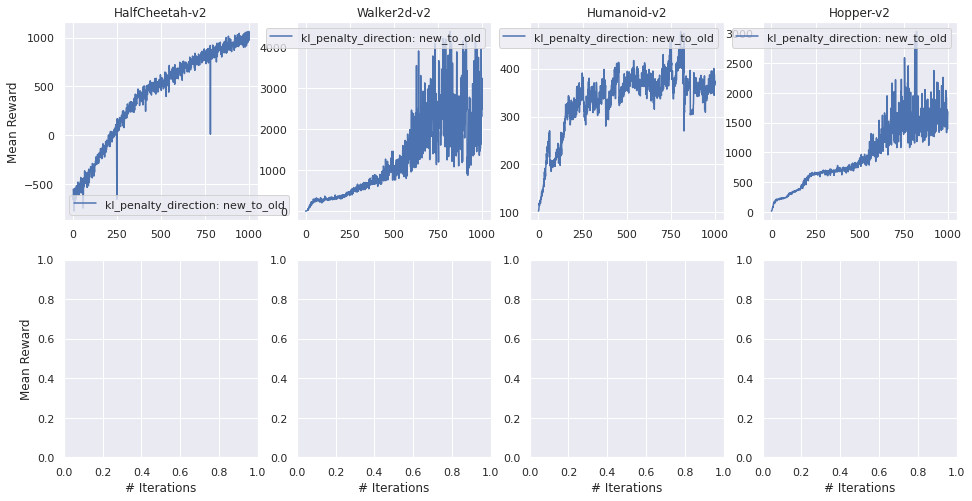

In [6]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt = 'kl_penalty_direction'
    for b in code_level_opts[cl_opt]:
        filt = opt[(opt[cl_opt] == b) & (opt.game == g)]
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"{cl_opt}: {b}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Reward')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
plt.show()

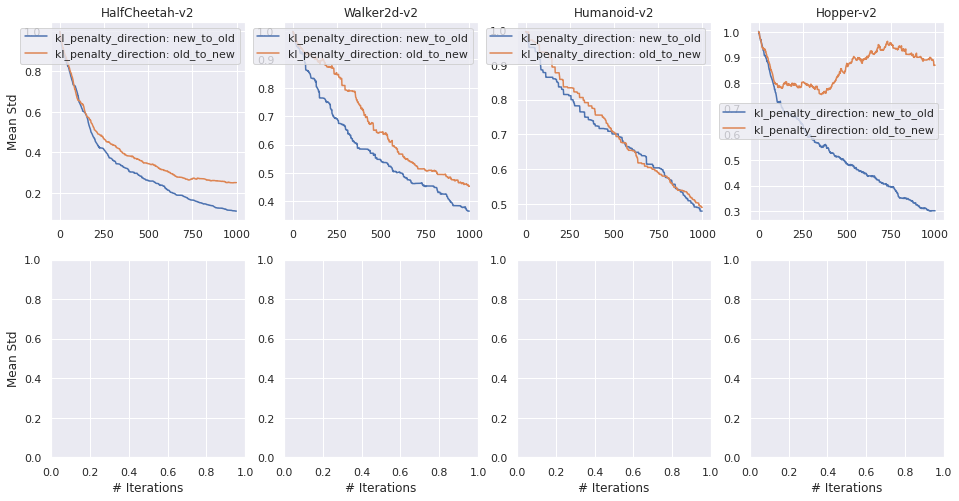

In [10]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt = 'kl_penalty_direction'
    for b in code_level_opts[cl_opt]:
        filt = opt[(opt[cl_opt] == b) & (opt.game == g)]
        sns.lineplot(filt.opt_step, filt.mean_std, n_boot=100,
                     ax=ax.flatten()[j], label=f"{cl_opt}: {b}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Std')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
plt.show()

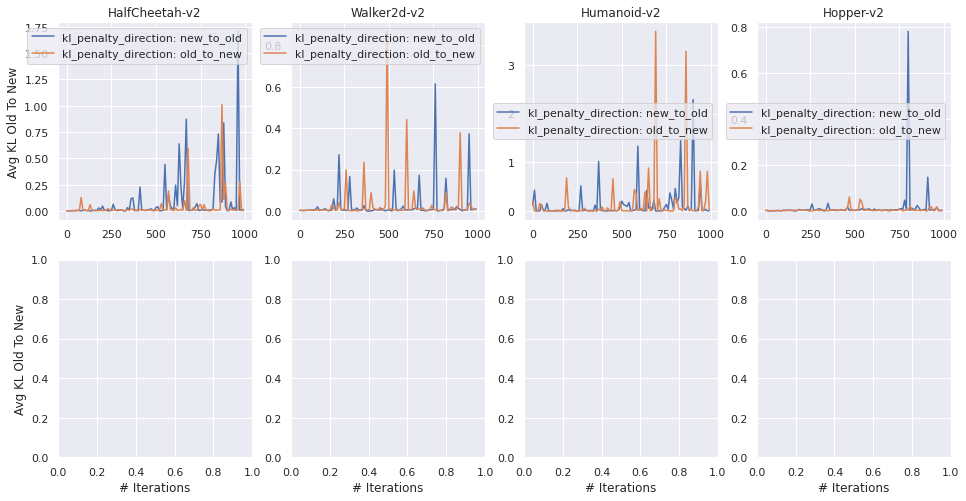

In [11]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt = 'kl_penalty_direction'
    for b in code_level_opts[cl_opt]:
        filt = constraints_heldout[(constraints_heldout[cl_opt] == b) & (constraints_heldout.game == g)]
        sns.lineplot(filt.opt_step, filt.avg_kl_old_to_new, n_boot=100,
                     ax=ax.flatten()[j], label=f"{cl_opt}: {b}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Avg KL Old To New')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
plt.show()

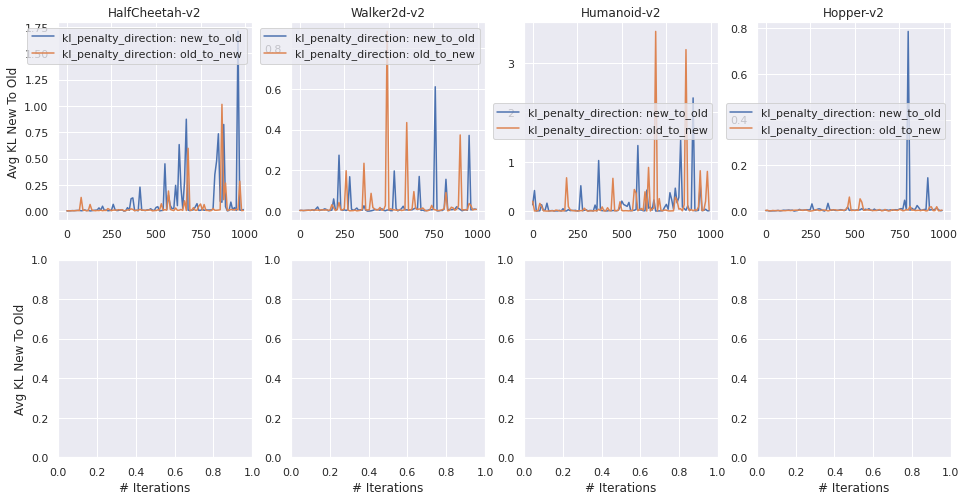

In [12]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt = 'kl_penalty_direction'
    for b in code_level_opts[cl_opt]:
        filt = constraints_heldout[(constraints_heldout[cl_opt] == b) & (constraints_heldout.game == g)]
        sns.lineplot(filt.opt_step, filt.avg_kl_new_to_old, n_boot=100,
                     ax=ax.flatten()[j], label=f"{cl_opt}: {b}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Avg KL New To Old')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
plt.show()